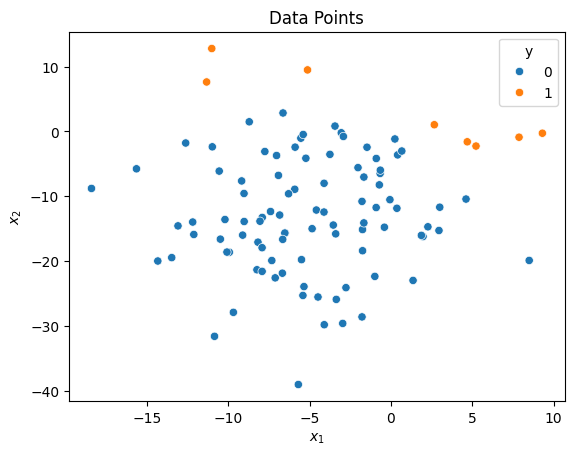

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Set seed
np.random.seed(1000)
# Generate data
n = 100
X = np.column_stack (( np.random.normal(-5 , 5 , n ), np.random.normal (-10 , 10 , n )))
X_design = np.column_stack(( np.ones( n ), X ) )
z = 2 * X[:, 0] + 3 * X[:, 1]
pr = 1 / ( 1 + np.exp (-z))
y = (pr > 0.5).astype(int)
# Create DataFrame
df = pd.DataFrame ({'X1 ': X[:, 0], 'X2': X[:, 1], 'y': y})
# Scatter plot
sns.scatterplot( data =df, x='X1 ', y='X2', hue=df['y'].astype(str))
plt.xlabel ( r'$x_1$')
plt.ylabel ( r'$x_2$')
plt.title ('Data Points')
plt.legend (title ='y')
plt.show ()


**Question 1b**:
**Visualize Remp in [−1, 4] × [−1, 4].**

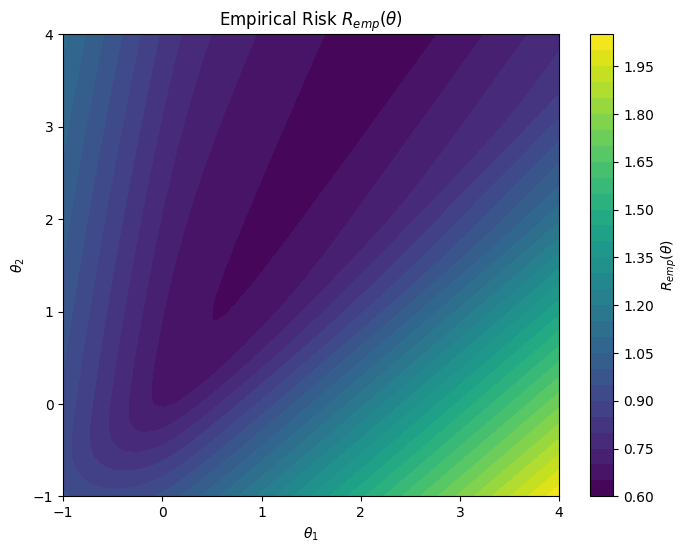

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Defines grid for θ1, θ2
theta1_vals = np.linspace(-1, 4, 50)
theta2_vals = np.linspace(-1, 4, 50)
Theta1, Theta2 = np.meshgrid(theta1_vals, theta2_vals)

# Function to compute empirical risk for each (theta1, theta2)
def empirical_risk(theta1, theta2, X, y):
    theta0 = 0  # Intercept assumed to be 0 for visualization
    logits = theta0 + theta1 * X[:, 0] + theta2 * X[:, 1]
    loss = np.log(1 + np.exp(-y * logits))
    return np.mean(loss)

# Compute risk values
R_vals = np.array([[empirical_risk(t1, t2, X, y) for t1 in theta1_vals] for t2 in theta2_vals])

# Contour plot of empirical risk
plt.figure(figsize=(8, 6))
contour = plt.contourf(Theta1, Theta2, R_vals, levels=30, cmap="viridis")
plt.colorbar(contour, label=r'$R_{emp}(\theta)$')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title(r'Empirical Risk $R_{emp}(\theta)$')
plt.show()


Questionn 1c:
**Find the gradient of R_emp for arbitrary θ.**

I implemented a quiver plot to display the gradient field, where arrows indicated the steepest descent direction.

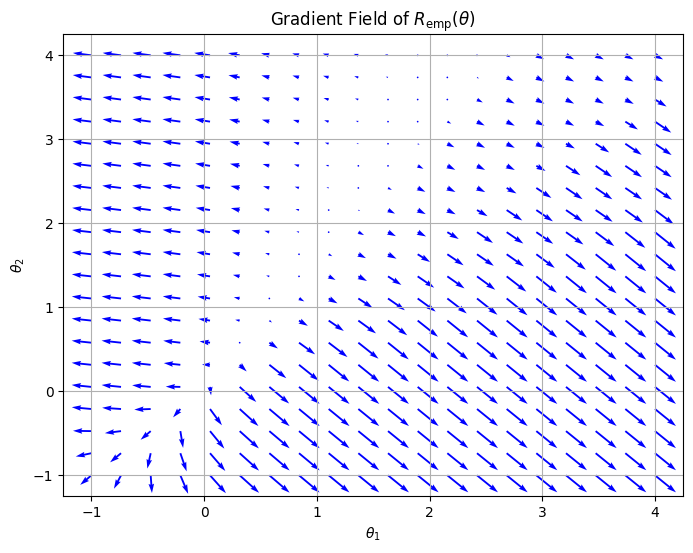

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Compute empirical risk gradient
def empirical_risk_gradient(theta1, theta2, X, y):
    """ Computes the gradient of R_emp for given theta1, theta2 values. """
    theta = np.array([0, theta1, theta2])  # Assume theta0 = 0 for visualization
    logits = X @ theta
    probabilities = 1 / (1 + np.exp(y * logits))
    gradient = np.mean(-y[:, np.newaxis] * X * probabilities[:, np.newaxis], axis=0)
    return gradient[1], gradient[2]  # Return gradients for theta1, theta2

# Define grid
theta1_vals = np.linspace(-1, 4, 20)
theta2_vals = np.linspace(-1, 4, 20)
Theta1, Theta2 = np.meshgrid(theta1_vals, theta2_vals)

# Compute gradient field
U = np.zeros_like(Theta1)
V = np.zeros_like(Theta2)
for i in range(Theta1.shape[0]):
    for j in range(Theta1.shape[1]):
        U[i, j], V[i, j] = empirical_risk_gradient(Theta1[i, j], Theta2[i, j], X_design, y)

# Plot gradient field
plt.figure(figsize=(8, 6))
plt.quiver(Theta1, Theta2, U, V, color="blue", angles="xy")
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title(r'Gradient Field of $R_{\text{emp}}(\theta)$')
plt.grid()
plt.show()


Question 1d:
**Solve the logistic regression via gradient descent**

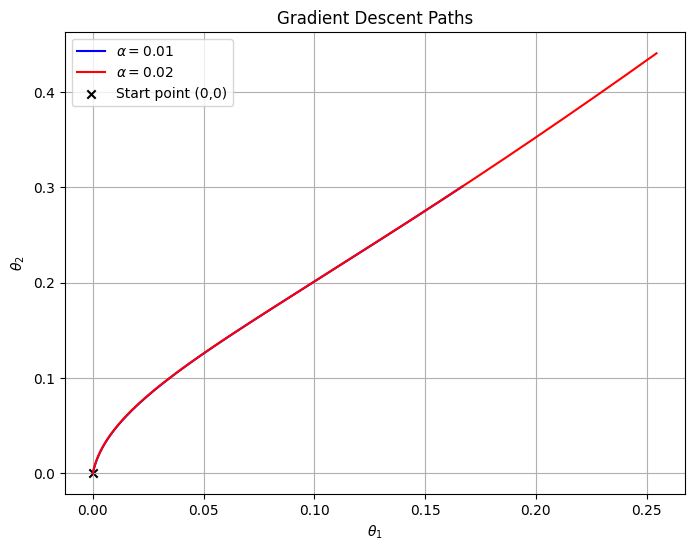

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient of empirical risk
def empirical_risk(theta, X, y):
    logits = X @ theta
    probabilities = 1 / (1 + np.exp(y * logits))
    gradient = np.mean(-y[:, np.newaxis] * X * probabilities[:, np.newaxis], axis=0)
    return gradient

# Gradient Descent Algorithm
def gradient_descent(X, y, alpha, num_steps):
    theta = np.zeros(X.shape[1])  # Initialize θ = (0,0)^T
    theta_history = [theta.copy()]
    
    for step in range(num_steps):
        grad = empirical_risk(theta, X, y)
        theta -= alpha * grad  # Update rule
        theta_history.append(theta.copy())
    
    return np.array(theta_history)

# Run gradient descent for α = 0.01 and α = 0.02
alpha1, alpha2 = 0.01, 0.02
num_steps = 500

theta_history1 = gradient_descent(X_design, y, alpha1, num_steps)
theta_history2 = gradient_descent(X_design, y, alpha2, num_steps)

# Plot θ evolution
plt.figure(figsize=(8, 6))
plt.plot(theta_history1[:, 1], theta_history1[:, 2], label=r'$\alpha=0.01$', color='blue')
plt.plot(theta_history2[:, 1], theta_history2[:, 2], label=r'$\alpha=0.02$', color='red')
plt.scatter([0], [0], color="black", marker="x", label="Start point (0,0)")
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Gradient Descent Paths')
plt.legend()
plt.grid()
plt.show()


Question 1e:
**Repeat (d) but add an L2 penalization term (with λ = 1) to the objective**

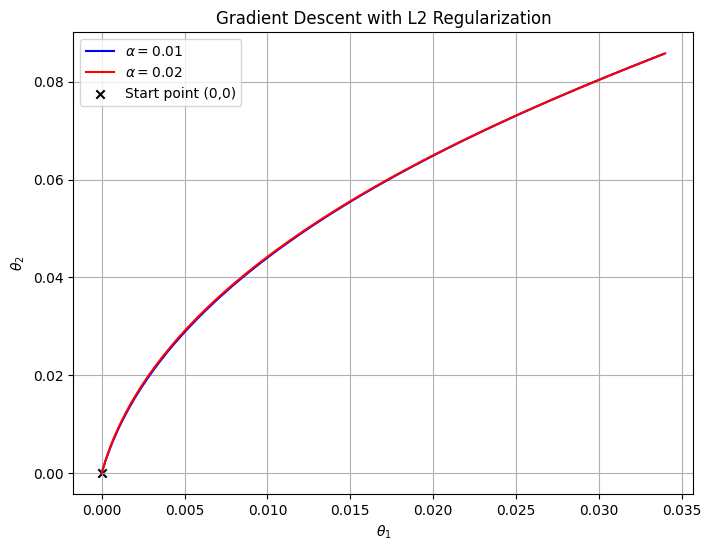

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient of empirical risk with L2 regularization
def empirical_risk_gradient_l2(theta, X, y, lambda_reg):
    logits = X @ theta
    probabilities = 1 / (1 + np.exp(y * logits))
    gradient = np.mean(-y[:, np.newaxis] * X * probabilities[:, np.newaxis], axis=0)
    gradient += lambda_reg * theta  # Add L2 regularization term
    return gradient

# Gradient Descent Algorithm with L2 Regularization
def gradient_descent_l2(X, y, alpha, num_steps, lambda_reg):
    theta = np.zeros(X.shape[1])  # Initialize θ = (0,0)^T
    theta_history = [theta.copy()]
    
    for step in range(num_steps):
        grad = empirical_risk_gradient_l2(theta, X, y, lambda_reg)
        theta -= alpha * grad  # Update rule
        theta_history.append(theta.copy())
    
    return np.array(theta_history)

# Run gradient descent with L2 regularization for α = 0.01 and α = 0.02
lambda_reg = 1  # Regularization parameter
alpha1, alpha2 = 0.01, 0.02
num_steps = 500

theta_history1 = gradient_descent_l2(X_design, y, alpha1, num_steps, lambda_reg)
theta_history2 = gradient_descent_l2(X_design, y, alpha2, num_steps, lambda_reg)

# Plot θ evolution
plt.figure(figsize=(8, 6))
plt.plot(theta_history1[:, 1], theta_history1[:, 2], label=r'$\alpha=0.01$', color='blue')
plt.plot(theta_history2[:, 1], theta_history2[:, 2], label=r'$\alpha=0.02$', color='red')
plt.scatter([0], [0], color="black", marker="x", label="Start point (0,0)")
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Gradient Descent with L2 Regularization')
plt.legend()
plt.grid()
plt.show()


Question 1f: 
**Visualize the regularized R_emp in [−1, 4] × [−1, 4]**

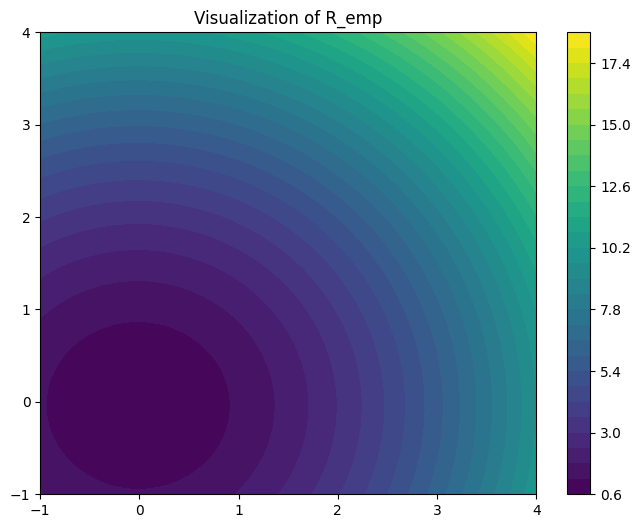

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_loss(theta, X, y , lambd=1):
    z = X @ theta #matrix-vector multiplication
    loss = np.mean(np.log(1 + np.exp(-y * z)))+ (lambd/2)*np.sum(theta**2)
    return loss

np.random.seed(42)
n = 100
X = np.column_stack((np.ones(n), np.random.normal(size=(n, 2))))
y = 2 * (np.random.rand(n) > 0.5) - 1

theta1_vals = np.linspace(-1, 4, 50)
theta2_vals = np.linspace(-1, 4, 50)
Theta1, Theta2 = np.meshgrid(theta1_vals, theta2_vals)

loss_grid = np.zeros_like(Theta1)
for i in range(Theta1.shape[0]):
    for j in range(Theta1.shape[1]):
        theta = np.array([0, Theta1[i, j], Theta2[i, j]])
        loss_grid[i, j] = logistic_loss(theta, X, y)


plt.figure(figsize=(8,6))
contour = plt.contourf(Theta1, Theta2, loss_grid, levels=30, cmap='viridis')
plt.colorbar(contour)
plt.title('Visualization of R_emp')
plt.xlabel('')
plt.ylabel('')
plt.show()


Question 1g: 
**Repeat (e) but with backtracking. Set $\gamma$ = 0.9 and $\tau$ = 0.5.**

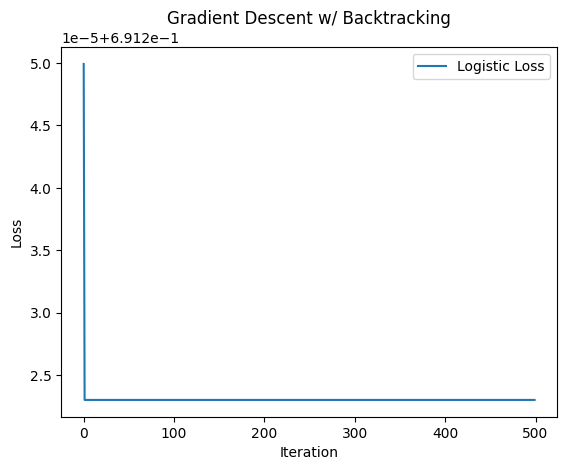

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_loss(theta, X, y):
    z = X @ theta
    return np.mean(np.log(1 + np.exp(-y * z)))

def logistic_loss_gradient(theta, X, y):
    z = X @ theta
    probabs = 1 / (1 + np.exp(-z))
    return -X.T @ (y * (1 - probabs)) / len(y)

# initialize step size and reduce it by a factor of tau 
# if the condition is not met
def backtracking(X, y, theta, grad, alpha=1, gamma=0.9, tau=0.5):
    while logistic_loss(theta - alpha * grad, X, y) > logistic_loss(theta, X, y) - gamma * alpha * np.dot(grad, grad):
        alpha *= tau
    return alpha

np.random.seed(42)
n = 100
X = np.column_stack((np.ones(n), np.random.normal(size=(n, 2))))
y = 2 * (np.random.rand(n) > 0.5) - 1

theta = np.zeros(X.shape[1])
steps=500
history = []

for i in range(steps):
    grad = logistic_loss_gradient(theta, X, y)
    alpha = backtracking(X, y, theta, grad, alpha=1, gamma=0.9, tau=0.5)
    theta -= alpha * grad
    history.append(logistic_loss(theta, X, y))

plt.plot(history, label='Logistic Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent w/ Backtracking')
plt.legend()
plt.show()